In [4]:
import matplotlib as plt

## Step 1: Image Acquazisation

In [1]:
import cv2
cap = cv2.VideoCapture(0)  # 0 = default camera
ret, frame = cap.read()    # Capture a frame
if ret:
    cv2.imwrite('acquired_image.jpg', frame)  # Save for next steps
cap.release()


##  Step 2: Preprocessing

In [2]:
import cv2
img=cv2.imread("acquired_image.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur=cv2.GaussianBlur(gray,(5,5),0)  # Denoise
equalized=cv2.equalizeHist(blur)
cv2.imwrite('preprocessed.jpg', equalized)    
cv2.imshow("Preprocessed",equalized)    
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Using Matplotlib

(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

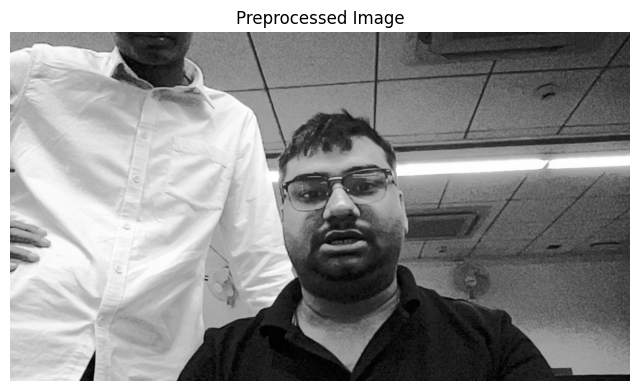

In [7]:
import cv2
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("acquired_image.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian blur (denoising)
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Histogram equalization
equalized = cv2.equalizeHist(blur)

# Save output
cv2.imwrite('preprocessed.jpg', equalized)

# Display using matplotlib (correct way for grayscale)
plt.figure(figsize=(8,6))
plt.imshow(equalized, cmap='gray')
plt.title("Preprocessed Image")
plt.axis('off')


## Step 3 : Segmentation

In [ ]:
import cv2
img=cv2.imread('preprocessed.jpg', 0)
thresh = cv2.adaptiveThreshold(
    img,                          # Input grayscale image
    250,                          # Max pixel value
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,  # Adaptive method
    cv2.THRESH_BINARY,            # Threshold type
    11,                           # Block size (neighborhood size)
    2                             # Constant subtracted from mean
) # Binary segmentation
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(output, contours, -1, (0,255,0), 2)  # Draw segmented regions
cv2.imwrite('segmented.jpg', output)
cv2.imshow('Segmented', output)
cv2.waitKey(0)
cv2.destroyAllWindows()



#### Using Matplotlib

(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

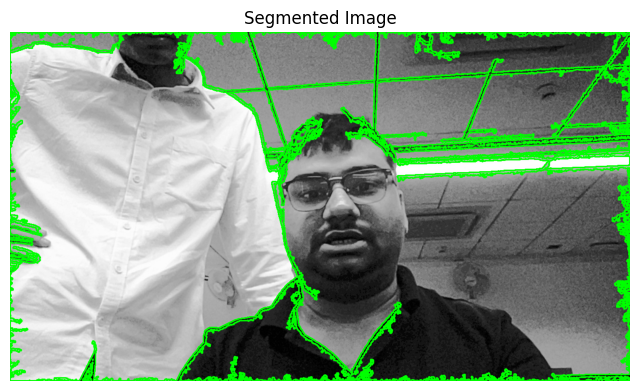

In [8]:
import cv2
import matplotlib.pyplot as plt

# Step 1: Read preprocessed grayscale image
img = cv2.imread('preprocessed.jpg', 0)

# Step 2: Adaptive Thresholding (Segmentation)
thresh = cv2.adaptiveThreshold(
    img,                              # Input grayscale image
    255,                              # Max pixel value (must be 255)
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,   # Adaptive method
    cv2.THRESH_BINARY,                # Threshold type
    11,                               # Block size (odd number)
    2                                 # Constant
)

# Step 3: Find contours
contours, _ = cv2.findContours(
    thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

# Step 4: Convert grayscale → BGR for drawing
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Step 5: Draw contours
cv2.drawContours(output, contours, -1, (0,255,0), 2)

# Step 6: Save segmented output
cv2.imwrite('segmented.jpg', output)

# Step 7: Convert BGR → RGB for matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Step 8: Display using matplotlib (Jupyter safe)
plt.figure(figsize=(8,6))
plt.imshow(output_rgb)
plt.title("Segmented Image")
plt.axis('off')



## Step 4: Feature Extraction

In [ ]:
import cv2
img = cv2.imread('segmented.jpg', 0)
orb = cv2.ORB_create()
keypoints, descriptors = orb.detectAndCompute(img, None)  # Extract features
output = cv2.drawKeypoints(img, keypoints, None, color=(0,255,0))
cv2.imshow('Features', output)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Descriptors are arrays; save keypoints if needed

#### Using Matplotlib

Total keypoints detected: 1000
Descriptor shape: (1000, 32)


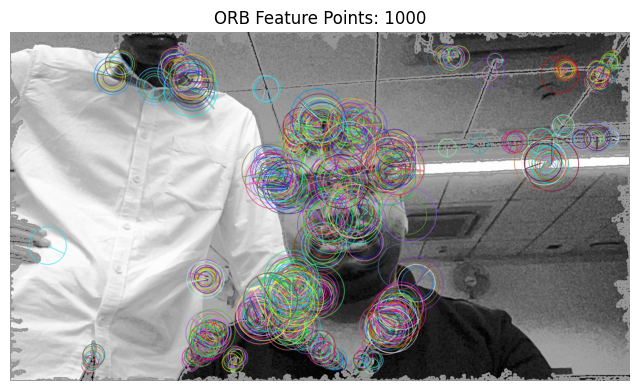

In [9]:
import cv2
import matplotlib.pyplot as plt

# Read segmented image (grayscale)
img = cv2.imread('segmented.jpg', 0)

# Create ORB detector
orb = cv2.ORB_create(nfeatures=1000)

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(img, None)

# Draw keypoints
output = cv2.drawKeypoints(
    img, keypoints, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

# Convert BGR → RGB for matplotlib (output is grayscale, so convert properly)
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display using matplotlib (Jupyter safe)
plt.figure(figsize=(8,6))
plt.imshow(output_rgb)
plt.title(f"ORB Feature Points: {len(keypoints)}")
plt.axis('off')

# Save output
cv2.imwrite("orb_features.jpg", output)

print("Total keypoints detected:", len(keypoints))
print("Descriptor shape:", descriptors.shape if descriptors is not None else None)


## Step 5: Match Features

In [ ]:
import cv2
import numpy as np
img1 = cv2.imread('segmented.jpg', 0)
img2 = cv2.imread('another_image.jpg', 0)  # Assume a second image
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)  # Good matches
output = cv2.drawMatches(img1, kp1, img2, kp2, matches[:10], None)
cv2.imshow('Matches', output)
cv2.waitKey(0)
cv2.destroyAllWindows()


#### Using Matplotlib

Total matches: 260


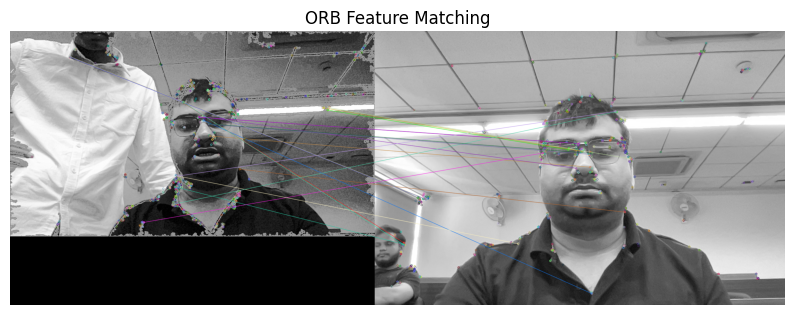

In [10]:
import cv2
import matplotlib.pyplot as plt

# Read grayscale images
img1 = cv2.imread('segmented.jpg', 0)
img2 = cv2.imread('another_image.jpg', 0)

# Safety checks
if img1 is None:
    raise ValueError("segmented.jpg not found")

if img2 is None:
    raise ValueError("another_image.jpg not found")

# Create ORB detector
orb = cv2.ORB_create(nfeatures=1000)

# Detect keypoints and descriptors
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# Safety check for descriptors
if des1 is None or des2 is None:
    raise ValueError("No features detected in one of the images")

# Brute Force Matcher (Hamming Distance)
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(des1, des2)

# Sort by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 20 matches
output = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None)

# Convert BGR → RGB for matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display using matplotlib (Jupyter safe)
plt.figure(figsize=(10,6))
plt.imshow(output_rgb)
plt.title("ORB Feature Matching")
plt.axis('off')

# Save output
cv2.imwrite("feature_matching.jpg", output)

print("Total matches:", len(matches))


### Step 6: Object Classification

In [ ]:
import cv2

img = cv2.imread('segmented.jpg', 0)
contours, _ = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    area = cv2.contourArea(cnt)
    label = "Large" if area > 1000 else "Small"  # Simple classification
    cv2.drawContours(output, [cnt], 0, (0,255,0), 2)
    cv2.putText(output, label, (cnt[0][0][0], cnt[0][0][1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 1)
cv2.imshow('Classified', output)
cv2.waitKey(0)
cv2.destroyAllWindows()


#### Using Matplotlib`

Total objects detected: 1


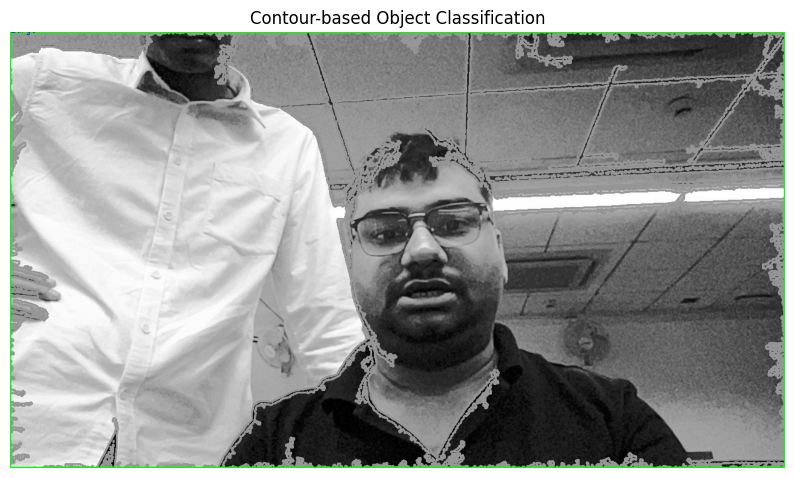

In [11]:
import cv2
import matplotlib.pyplot as plt

# Read segmented image (grayscale)
img = cv2.imread('segmented.jpg', 0)

# Find contours
contours, _ = cv2.findContours(
    img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

# Convert grayscale → BGR for colored drawing
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Loop through contours and classify
for cnt in contours:
    area = cv2.contourArea(cnt)
    label = "Large" if area > 1000 else "Small"

    cv2.drawContours(output, [cnt], -1, (0,255,0), 2)
    cv2.putText(output, label,
                (cnt[0][0][0], cnt[0][0][1]),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (255,0,0), 1)

# Convert BGR → RGB for matplotlib
output_rgb = cv2.cvtColor(output, cv2.COLOR_BGR2RGB)

# Display using matplotlib (Jupyter safe)
plt.figure(figsize=(10,6))
plt.imshow(output_rgb)
plt.title("Contour-based Object Classification")
plt.axis('off')

# Save output
cv2.imwrite("classified.jpg", output)

print("Total objects detected:", len(contours))


## Step 7

In [ ]:
import cv2
import numpy as np
# Assume detections: list of [x,y,w,h,score]
detections = np.array([[100,100,50,50,0.9], [105,105,50,50,0.8]])  # Example
indices = cv2.dnn.NMSBoxes(detections[:,:4].tolist(), detections[:,4].tolist(), 0.5, 0.4)
img = cv2.imread('segmented.jpg')
for i in indices:
    x,y,w,h = detections[i,:4].astype(int)
    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
cv2.imshow('Post-processed Output', img)
cv2.waitKey(0)
cv2.destroyAllWindows()
# Output: Save report or alert (e.g., print("Detected objects: {}".format(len(indices))))


#### Using Matplotlib

Final detected objects: 1


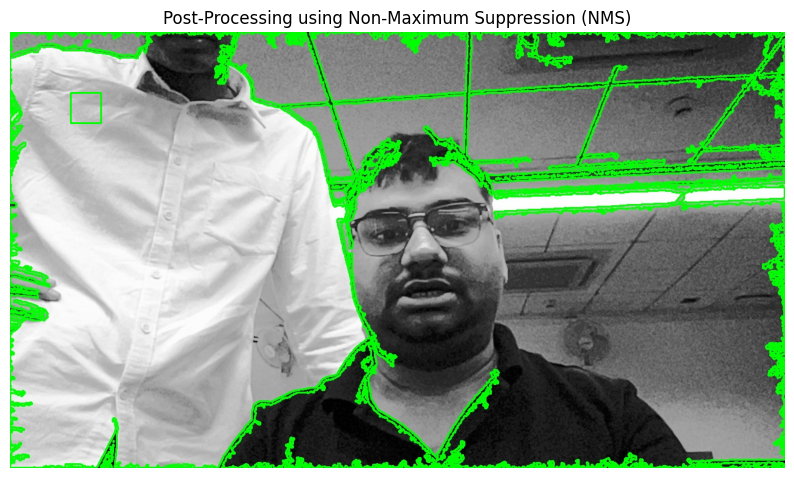

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assume detections: [x, y, w, h, confidence]
detections = np.array([
    [100, 100, 50, 50, 0.9],
    [105, 105, 50, 50, 0.8]
])

# Apply Non-Maximum Suppression (NMS)
indices = cv2.dnn.NMSBoxes(
    detections[:, :4].tolist(),
    detections[:, 4].tolist(),
    score_threshold=0.5,
    nms_threshold=0.4
)

# Read image
img = cv2.imread('segmented.jpg')

# Draw filtered bounding boxes
if len(indices) > 0:
    for i in indices.flatten():
        x, y, w, h = detections[i, :4].astype(int)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)

# Convert BGR → RGB for matplotlib
output_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display using matplotlib (Jupyter safe)
plt.figure(figsize=(10,6))
plt.imshow(output_rgb)
plt.title("Post-Processing using Non-Maximum Suppression (NMS)")
plt.axis('off')

# Save output
cv2.imwrite("nms_output.jpg", img)

print("Final detected objects:", len(indices))


### Classical Face Detection Pipeline

In [ ]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
cap = cv2.VideoCapture(0)          # or use 'photo.jpg' → img = cv2.imread()
while True:
    ret, frame = cap.read()
    if not ret: break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # Fixed indentation here
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30,30))
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)  # Fixed indentation here
        roi_gray = gray[y:y+h, x:x+w]  # Fixed indentation here
        eyes = eye_cascade.detectMultiScale(roi_gray)  # Fixed indentation here
        for (ex,ey,ew,eh) in eyes:  # Fixed indentation here
            cv2.rectangle(frame, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0,255,0), 1)
    cv2.imshow('Classical Face + Eye Detection', frame)  # Fixed indentation here
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Fixed indentation here
        break  # Fixed indentation here
cap.release()
cv2.destroyAllWindows()

#### Using Matplotlib

In [ ]:
import cv2

# Load Haar Cascade models
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
)
eye_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_eye.xml'
)

# Start webcam capture
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        print("Camera not detected")
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(
        gray, scaleFactor=1.1, minNeighbors=5, minSize=(30,30)
    )

    # Draw bounding boxes
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)

        # Eye detection inside face ROI
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 5)

        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(frame, (x+ex, y+ey),
                          (x+ex+ew, y+ey+eh), (0,255,0), 1)

    cv2.imshow("Classical Face + Eye Detection", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
